In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service

In [ ]:
service = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service = service)
navegador.get('http://www.ssp.sp.gov.br/transparenciassp/')

In [ ]:
navegador.find_element(By.ID,'cphBody_btnFurtoVeiculo').click() 
navegador.find_element(By.ID,'cphBody_lkAno20').click()
navegador.find_element(By.XPATH,'//*[@id="cphBody_lkAno20"]').click()
navegador.find_element(By.ID,'nopadd:nth-child(1)').click()

In [ ]:
#Exportando a Tabela do mês de Março
navegador.find_element(By.ID,'cphBody_lkMes3').click()
navegador.find_element(By.XPATH,'//*[@id="cphBody_ExportarBOLink"]').click()

In [ ]:
#Exportando a Tabela do mês de Abril
navegador.find_element(By.ID,'cphBody_lkMes4').click()
navegador.find_element(By.XPATH,'//*[@id="cphBody_ExportarBOLink"]').click()

In [ ]:
#Exportando a Tabela do mês de Maio
navegador.find_element(By.ID,'cphBody_lkMes5').click()
navegador.find_element(By.XPATH,'//*[@id="cphBody_ExportarBOLink"]').click()

In [8]:
# importando a biblioteca Pandas, Numpy, Missingno e Plotly
import pandas as pd
import numpy as np
import missingno as msno
# import matplotlib as mlp
# import seaborn as sns
import plotly.express as px
import datetime as dt

In [136]:
lista = ['../1_Bases_Originais/DadosBO_2020_3.csv',
         '../1_Bases_Originais/DadosBO_2020_4.csv',
         '../1_Bases_Originais/DadosBO_2020_5.csv']

In [137]:
dados = pd.DataFrame(pd.read_csv(lista[i], encoding = 'ISO-8859-1', sep = ';'))

In [138]:
for i in range(1,len(lista)): 
    data = pd.read_csv(lista[i], sep=';', encoding='ISO-8859-1') 
    df = pd.DataFrame(data) 
    dados = pd.concat([dados,df],axis=0)
print(dados)

      ANO_BO  NUM_BO NUMERO_BOLETIM       BO_INICIADO        BO_EMITIDO  \
0       2020  547001    547001/2020  30/04/2020 16:31  01/05/2020 00:05   
1       2020  547413    547413/2020  30/04/2020 17:30  01/05/2020 00:15   
2       2020    3308      3308/2020  01/05/2020 00:15  01/05/2020 00:22   
3       2020    2121      2121/2020  01/05/2020 00:14  01/05/2020 00:26   
4       2020    2079      2079/2020  30/04/2020 13:46  01/05/2020 01:12   
...      ...     ...            ...               ...               ...   
5981    2020  704084    704084/2020  31/05/2020 22:16  31/05/2020 22:16   
5982    2020  704143    704143/2020  31/05/2020 22:31  31/05/2020 22:33   
5983    2020  704176    704176/2020  31/05/2020 22:58  31/05/2020 22:57   
5984    2020  704226    704226/2020  31/05/2020 23:26  31/05/2020 23:24   
5985    2020  704303    704303/2020  31/05/2020 23:37  31/05/2020 23:40   

     DATAOCORRENCIA HORAOCORRENCIA PERIDOOCORRENCIA DATACOMUNICACAO  \
0        26/04/2020         

# tratamento

### Duplicados

In [139]:
dados.duplicated().sum()

5986

In [140]:
# Duplicando, resetando e dropando os dados duplicados
dados.index.value_counts()
dados.reset_index(drop=True).index.value_counts()
dados.duplicated().sum()
dados = dados.reset_index(drop=True).drop_duplicates()

In [141]:
#deixando o nome das colunas em minúsculo
dados.columns = dados.columns.str.lower()

In [142]:
# Substituindo os caracteres especiais
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                '\W':'_',
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                ' ':'',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"              
              
              }, regex=True)

<Axes: >

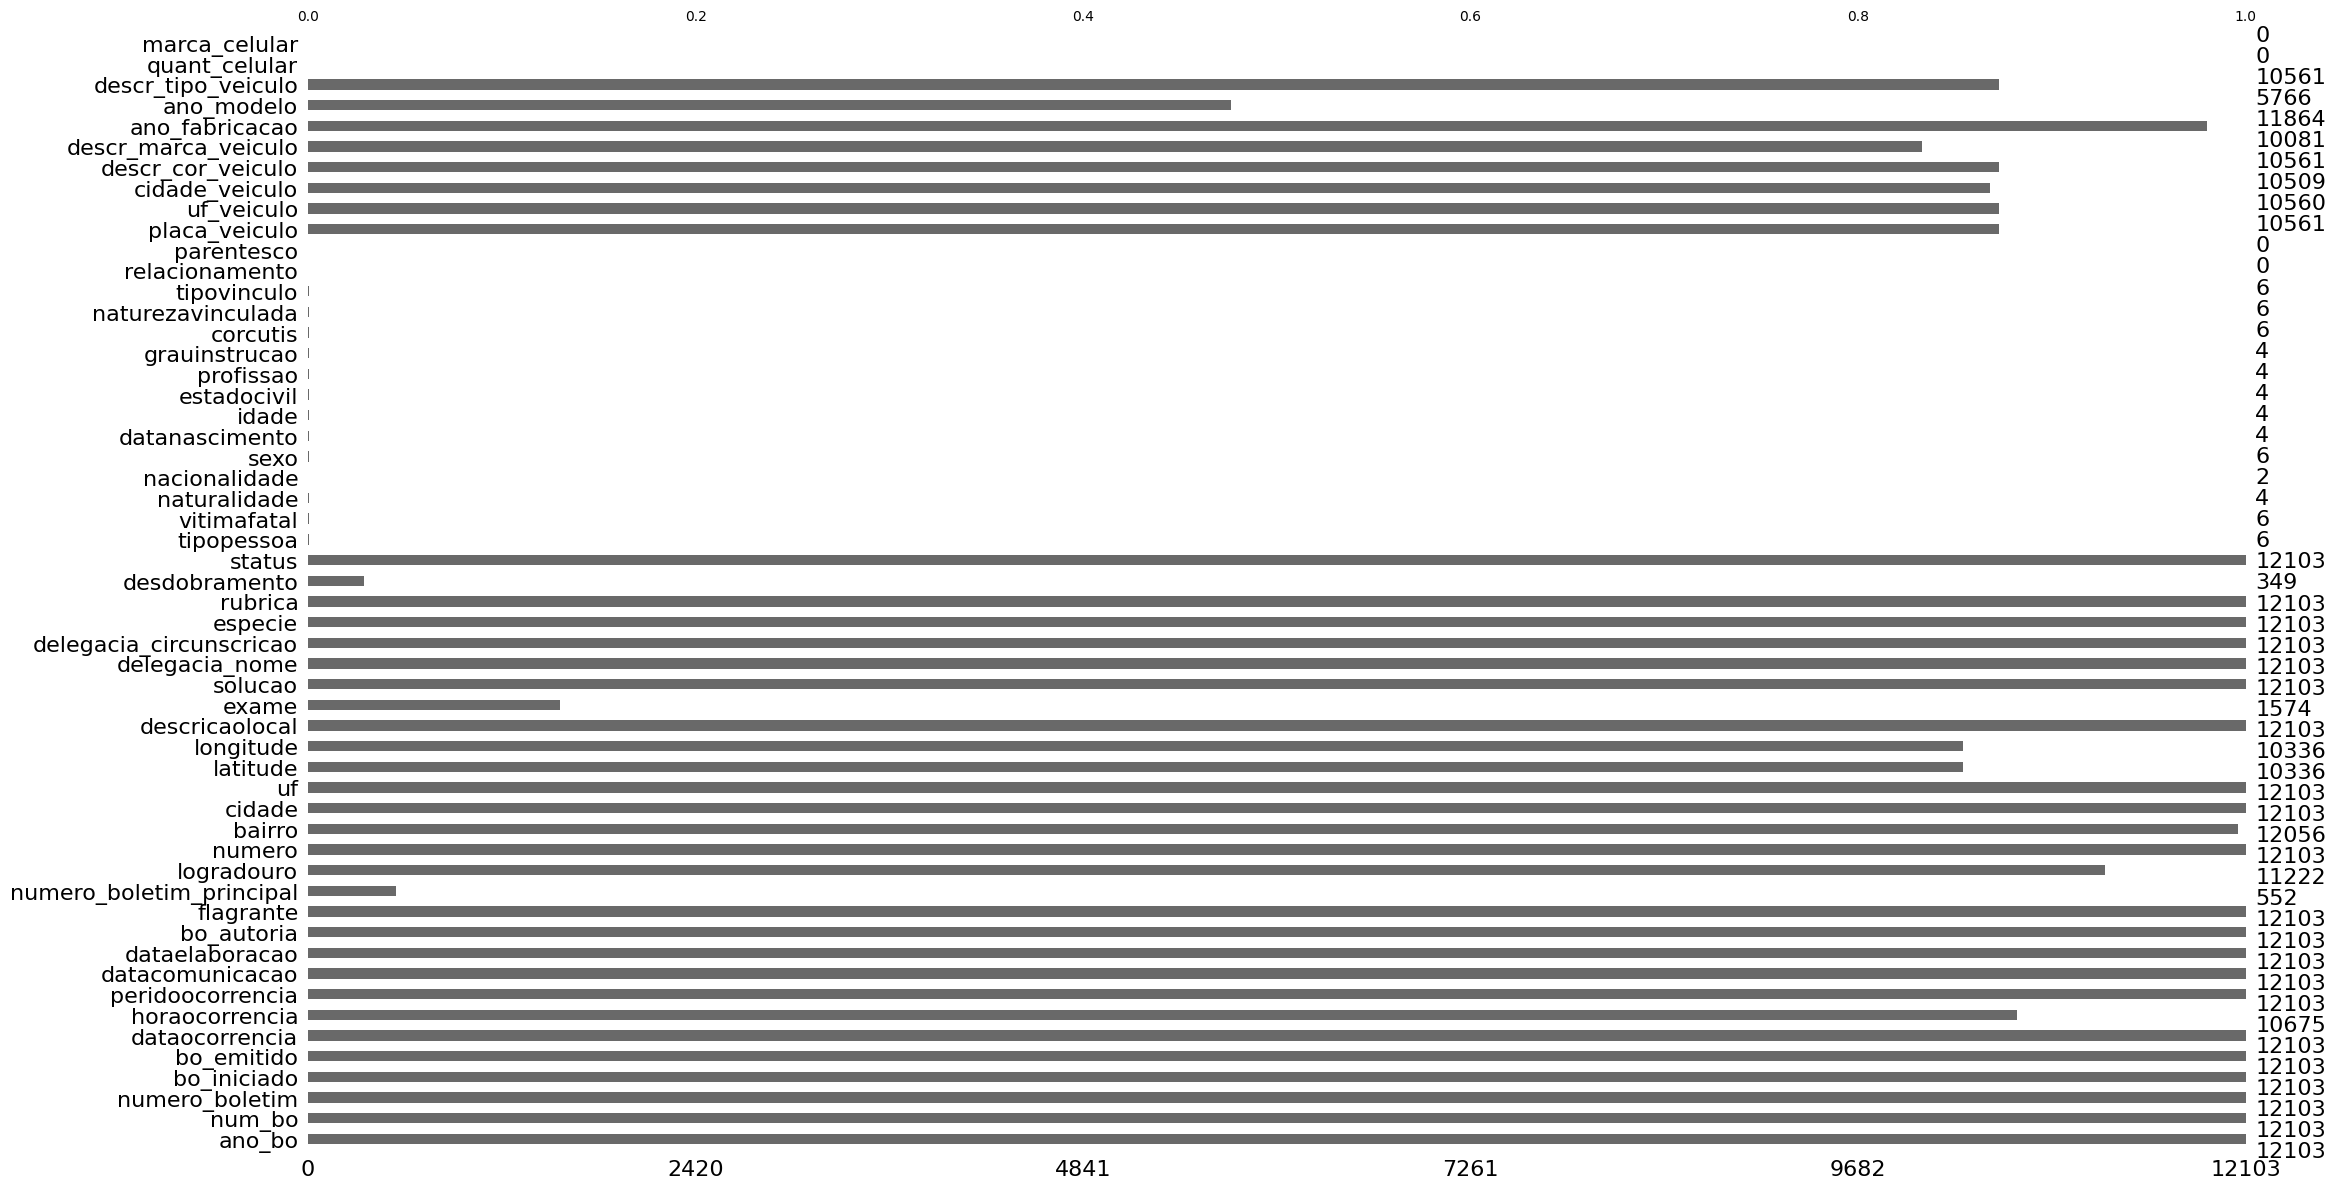

In [143]:
msno.bar(dados)

### Dropando colunas desnecessárias

In [144]:
## Dropei a coluna vítima fatal e outras colunas que dependem dela pois de
## acordo com o site da Porto Seguro "No furto, os itens são levados sem qualquer tipo de agressão ou hostilidade"

dados = dados.drop(columns=['marca_celular', 'quant_celular'])
dados = dados.drop(columns=['parentesco', 'relacionamento', 'tipovinculo', 'naturezavinculada'])
dados = dados.drop(columns=['tipopessoa', 'vitimafatal', 'naturalidade','nacionalidade', 'sexo', 'datanascimento', 'idade', 'estadocivil', 'profissao', 'grauinstrucao', 'corcutis'])
dados = dados.drop(columns=['numero_boletim_principal', 'exame', 'desdobramento'])

In [145]:
# Visualizando as colunas
dados.columns

Index(['ano_bo', 'num_bo', 'numero_boletim', 'bo_iniciado', 'bo_emitido',
       'dataocorrencia', 'horaocorrencia', 'peridoocorrencia',
       'datacomunicacao', 'dataelaboracao', 'bo_autoria', 'flagrante',
       'logradouro', 'numero', 'bairro', 'cidade', 'uf', 'latitude',
       'longitude', 'descricaolocal', 'solucao', 'delegacia_nome',
       'delegacia_circunscricao', 'especie', 'rubrica', 'status',
       'placa_veiculo', 'uf_veiculo', 'cidade_veiculo', 'descr_cor_veiculo',
       'descr_marca_veiculo', 'ano_fabricacao', 'ano_modelo',
       'descr_tipo_veiculo'],
      dtype='object')

### Tratando os dados nulos


In [146]:
# Somando os dados nulos de cada coluna
dados.isnull().sum()

ano_bo                        0
num_bo                        0
numero_boletim                0
bo_iniciado                   0
bo_emitido                    0
dataocorrencia                0
horaocorrencia             1428
peridoocorrencia              0
datacomunicacao               0
dataelaboracao                0
bo_autoria                    0
flagrante                     0
logradouro                  881
numero                        0
bairro                       47
cidade                        0
uf                            0
latitude                   1767
longitude                  1767
descricaolocal                0
solucao                       0
delegacia_nome                0
delegacia_circunscricao       0
especie                       0
rubrica                       0
status                        0
placa_veiculo              1542
uf_veiculo                 1543
cidade_veiculo             1594
descr_cor_veiculo          1542
descr_marca_veiculo        2022
ano_fabr

In [147]:
# Substituindo os Dados nulos por um valor rasuável
dados.horaocorrencia.fillna('22:00', inplace=True)

In [148]:
# Substituindo os dados nulos por algo que indique um valor desconhecido
dados.logradouro.fillna('NÃO INFORMADO', inplace=True)
dados.bairro.fillna('DESCONHECIDO', inplace=True)
dados.latitude.fillna('DESCONHECIDO', inplace=True)
dados.longitude.fillna('DESCONHECIDO', inplace=True)

<Axes: >

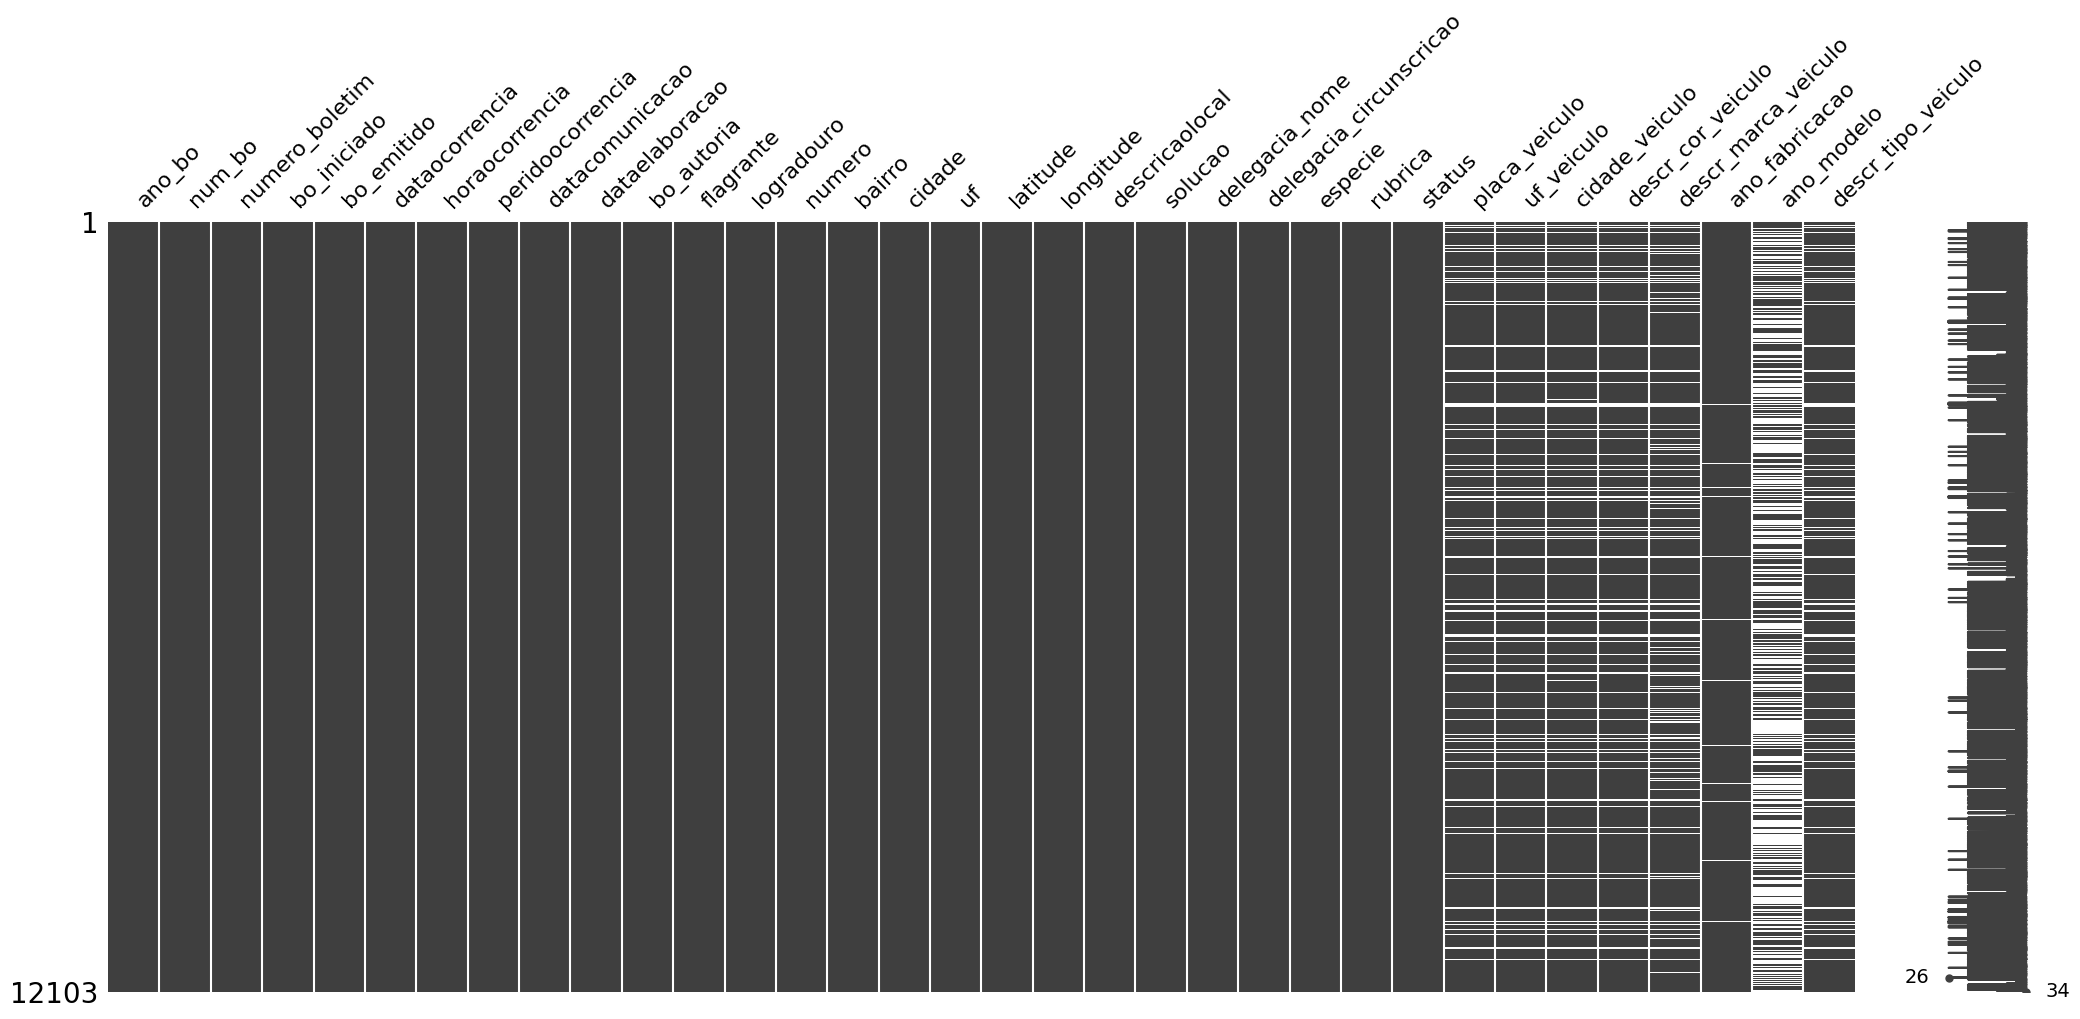

In [149]:
msno.matrix(dados)

In [150]:
dados.columns

Index(['ano_bo', 'num_bo', 'numero_boletim', 'bo_iniciado', 'bo_emitido',
       'dataocorrencia', 'horaocorrencia', 'peridoocorrencia',
       'datacomunicacao', 'dataelaboracao', 'bo_autoria', 'flagrante',
       'logradouro', 'numero', 'bairro', 'cidade', 'uf', 'latitude',
       'longitude', 'descricaolocal', 'solucao', 'delegacia_nome',
       'delegacia_circunscricao', 'especie', 'rubrica', 'status',
       'placa_veiculo', 'uf_veiculo', 'cidade_veiculo', 'descr_cor_veiculo',
       'descr_marca_veiculo', 'ano_fabricacao', 'ano_modelo',
       'descr_tipo_veiculo'],
      dtype='object')

In [151]:
# Substituindo os dados nulos por algo que indique um valor desconhecido
dados.placa_veiculo.fillna('NÃO INFORMADO', inplace=True)
dados.uf_veiculo.fillna('DESCONHECIDO', inplace=True)
dados.cidade_veiculo.fillna('DESCONHECIDO', inplace=True)
dados.descr_cor_veiculo.fillna('DESCONHECIDO', inplace=True)
dados.descr_marca_veiculo.fillna('DESCONHECIDO', inplace=True)

<Axes: >

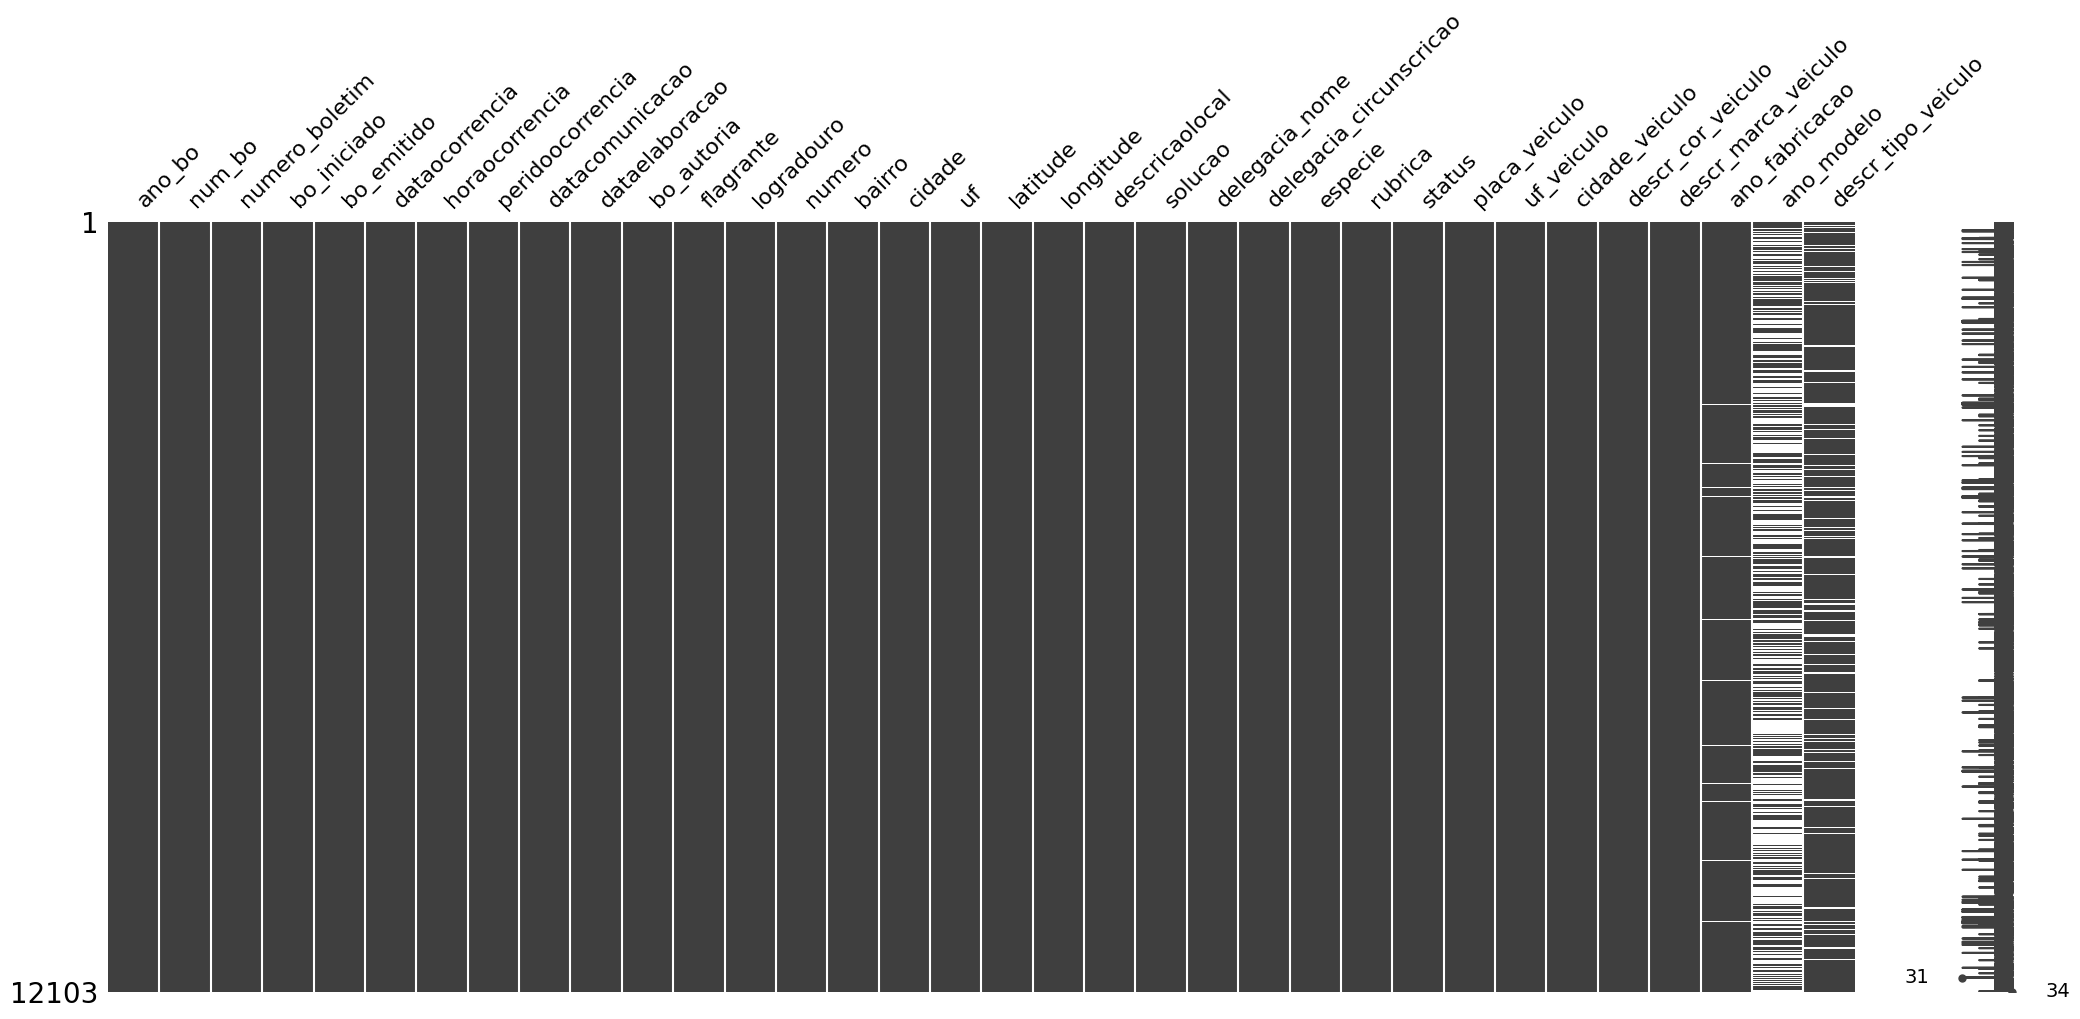

In [152]:
msno.matrix(dados)

In [153]:
px.box(dados.ano_fabricacao)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['ano_fabricacao', 'ano_fabricacao', 'ano_fabricacao', ...,
                          'ano_fabricacao', 'ano_fabricacao', 'ano_fabricacao'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([1999., 2001., 2007., ..., 2019., 2011., 2012.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [154]:
# Travando os dados outliers maiores que o valor máximo no valor máximo
dados.loc[dados.ano_fabricacao < 1970, 'ano_fabricacao'] = 1970

In [155]:
dados.ano_fabricacao

0        1999.0
1        2001.0
2        2007.0
3        2014.0
4        1970.0
          ...  
12098    2017.0
12099    2019.0
12100    2019.0
12101    2011.0
12102    2012.0
Name: ano_fabricacao, Length: 12103, dtype: float64

In [156]:
px.box(dados.ano_fabricacao)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['ano_fabricacao', 'ano_fabricacao', 'ano_fabricacao', ...,
                          'ano_fabricacao', 'ano_fabricacao', 'ano_fabricacao'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([1999., 2001., 2007., ..., 2019., 2011., 2012.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

<Axes: >

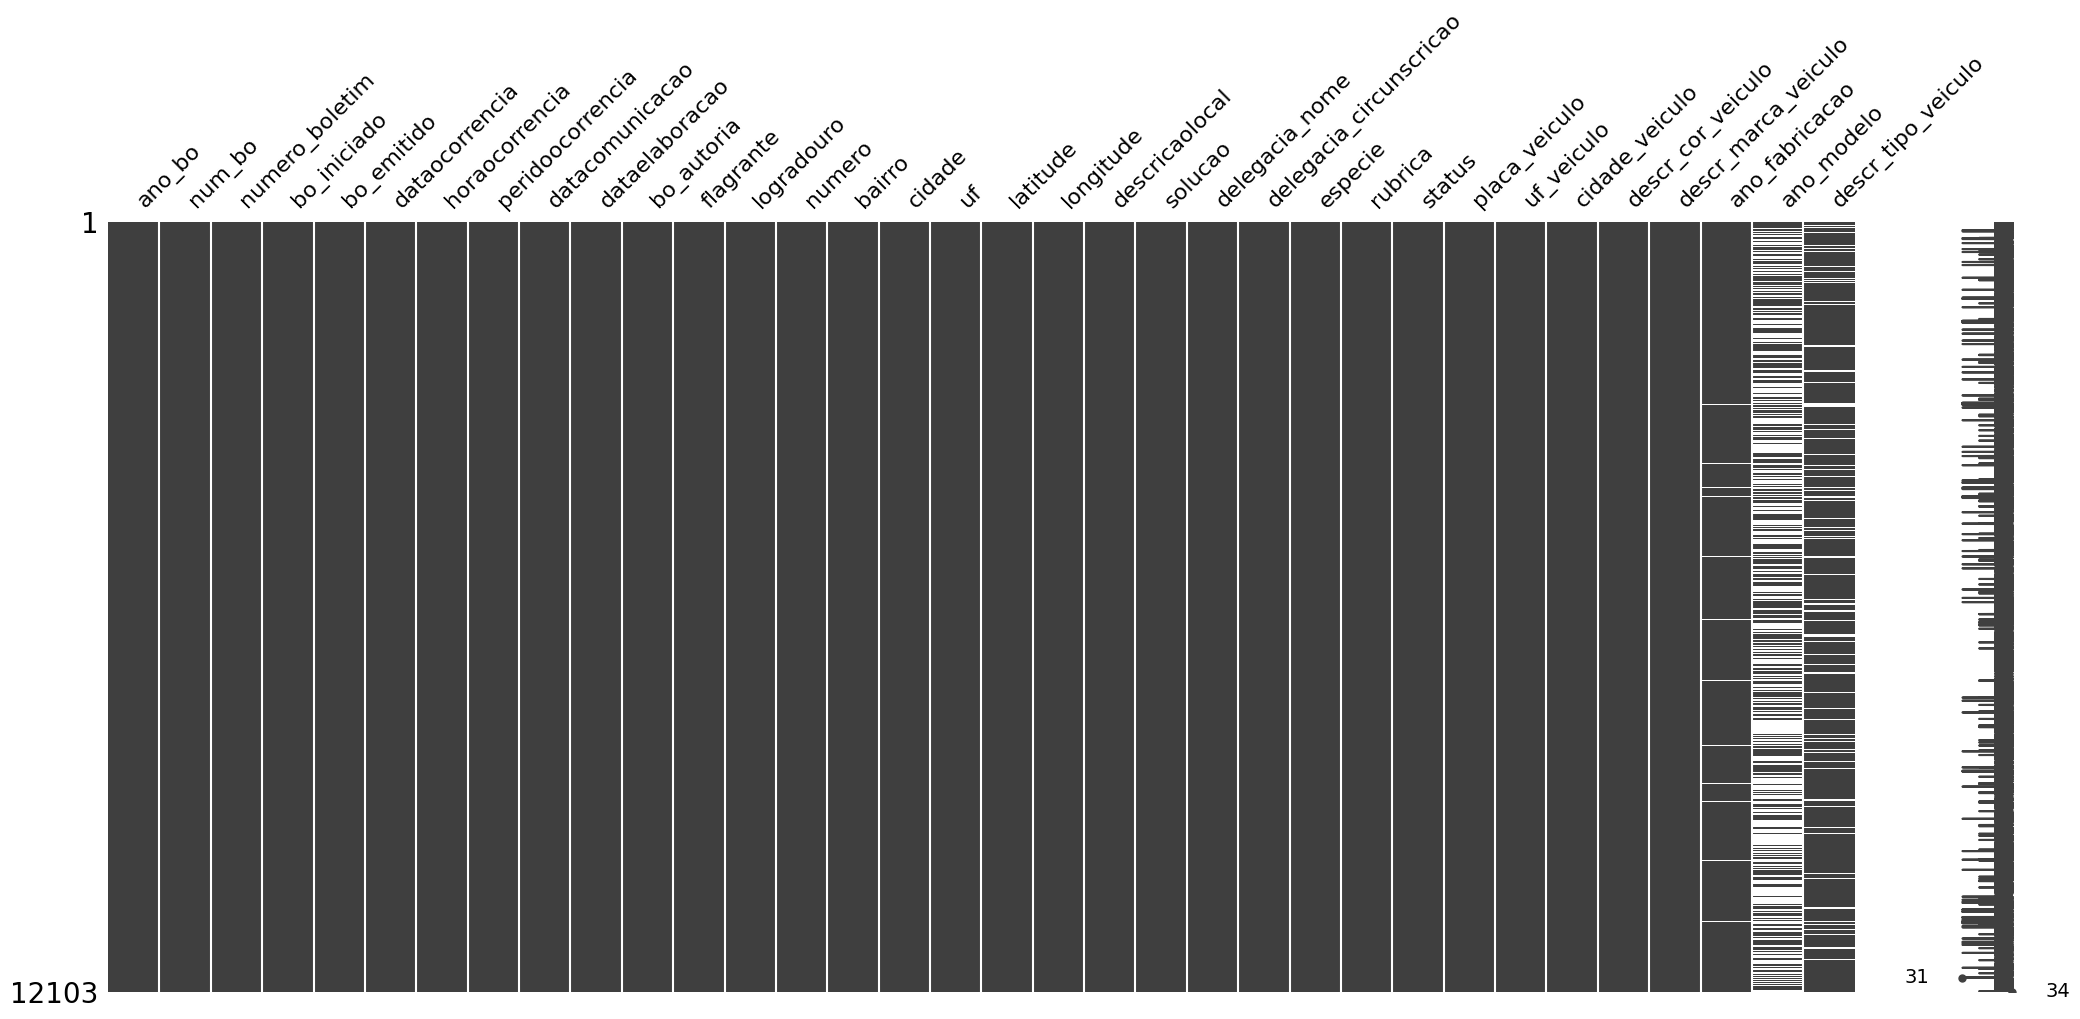

In [157]:
msno.matrix(dados)

In [158]:
dados.ano_fabricacao.fillna(dados.ano_fabricacao.median(), inplace=True)

In [159]:
dados.ano_modelo.fillna(dados.ano_modelo.median(), inplace=True)

In [160]:
px.box(dados.ano_modelo)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['ano_modelo', 'ano_modelo', 'ano_modelo', ..., 'ano_modelo',
                          'ano_modelo', 'ano_modelo'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([2004., 2004., 2007., ..., 2004., 2004., 2004.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [161]:
dados.loc[dados.ano_modelo < 2004, 'ano_modelo'] = 2004
dados.loc[dados.ano_modelo > 2020, 'ano_modelo'] = 2020

In [162]:
px.box(dados.ano_modelo)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['ano_modelo', 'ano_modelo', 'ano_modelo', ..., 'ano_modelo',
                          'ano_modelo', 'ano_modelo'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([2004., 2004., 2007., ..., 2004., 2004., 2004.]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [163]:
dados.descr_tipo_veiculo.fillna('NÃO INFORMADO', inplace=True)

<Axes: >

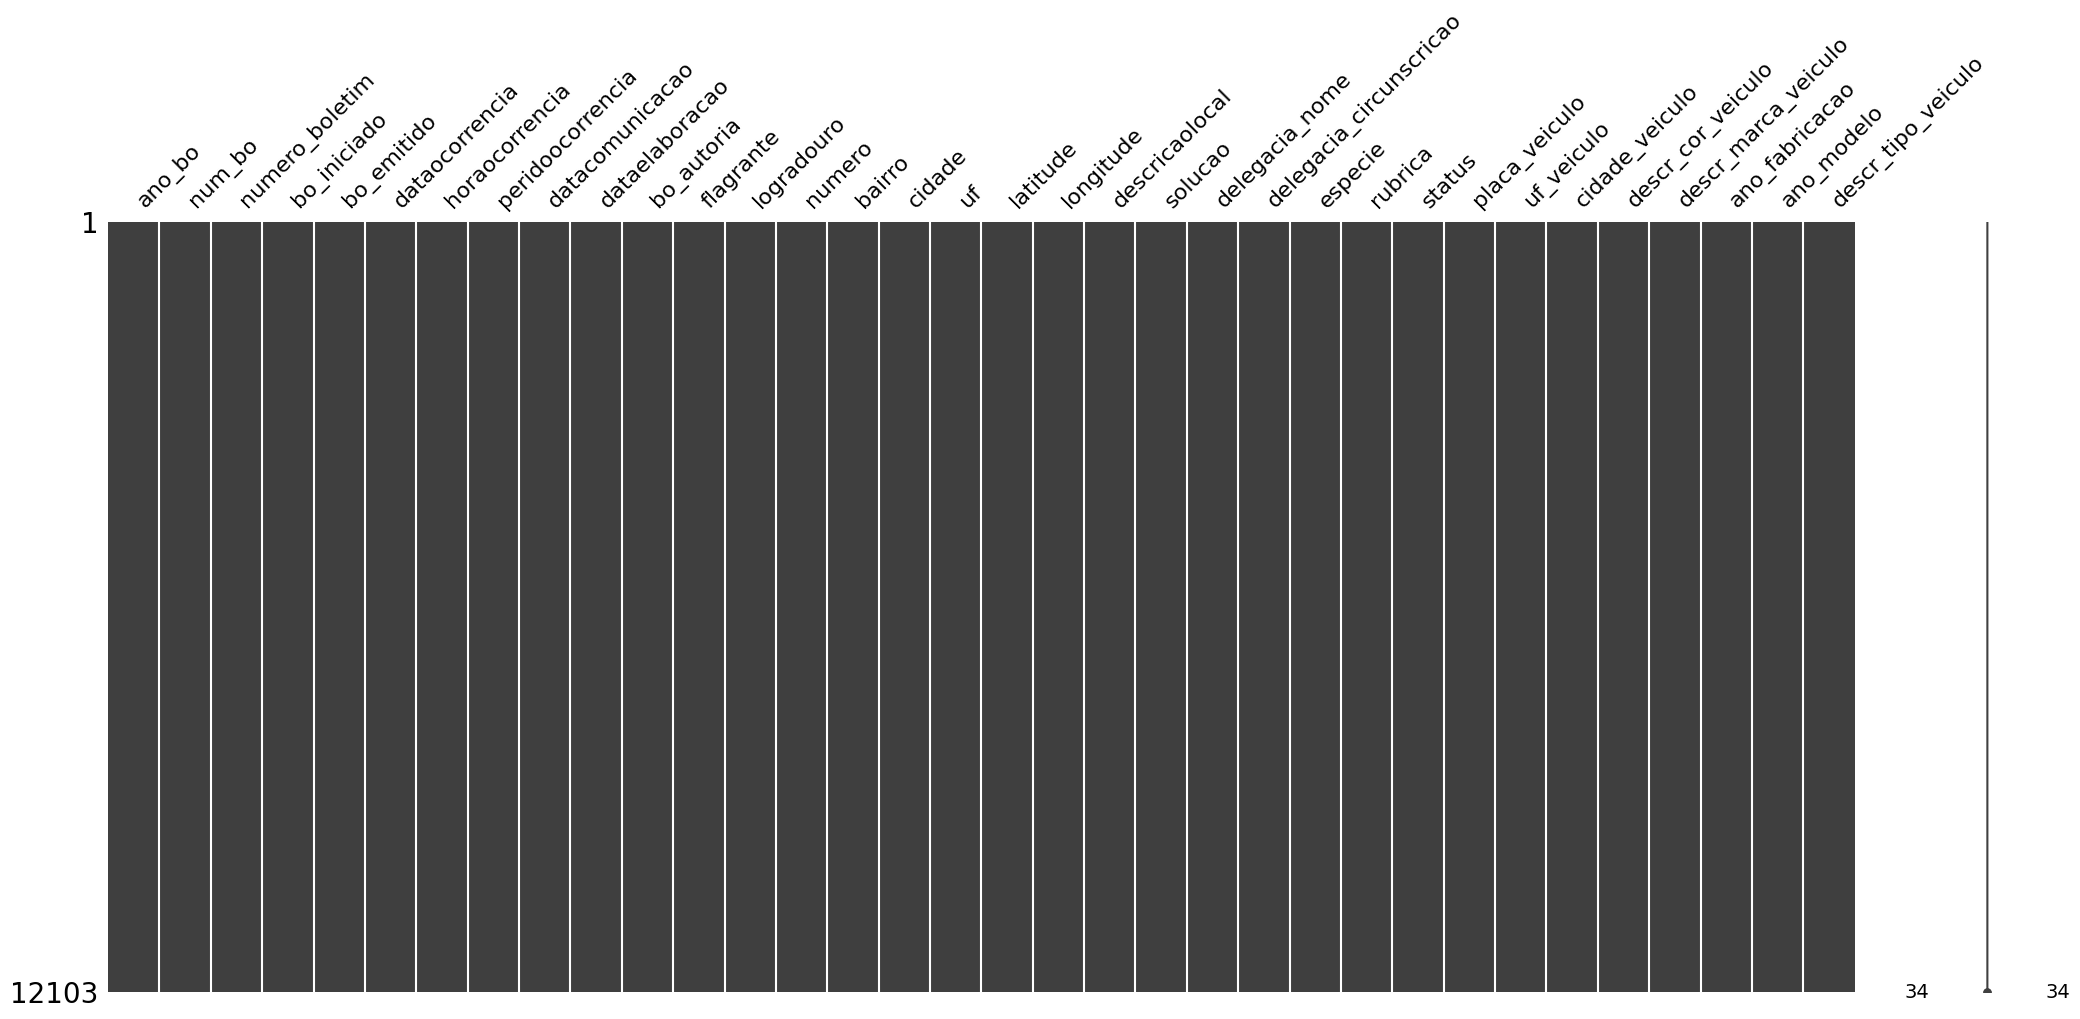

In [164]:
msno.matrix(dados)

In [165]:
dados.to_csv('../2_Bases_Tratadas/FURTO_VEICULOS.csv', sep=';')